In [15]:
%pip install locan



Note: you may need to restart the kernel to use updated packages.


In [16]:
import matplotlib.pyplot as plt
import numpy as np
import ripleyk
import locan as lc
from scipy.spatial.distance import pdist
from scipy.spatial import ConvexHull, Delaunay
from scipy.spatial import cKDTree
import pandas as pd


In [17]:

# create 10,000 points randomly distributed in a 2D space
np.random.seed(0)




In [18]:
def create_data(num_points):
    x1 = np.random.rand(num_points, 2)
    x2 = np.random.normal(0.5, 0.05, (num_points, 2))
    x3 = (
        np.random.normal(0.05, 0.01, (num_points, 2))
        + np.random.randint(0, 10, (num_points, 2)) / 10
    )
    return x1, x2, x3

def num_pairwise(x):
    return ((x ** 2) / 2  - x/2)

def manual_ripley(data):
    distances = pdist(data)
    return distances

def calculate_ripley_h(k, radaii):
    l_estimate = np.sqrt(k / np.pi)
    h_estimate = l_estimate - radaii
    return h_estimate

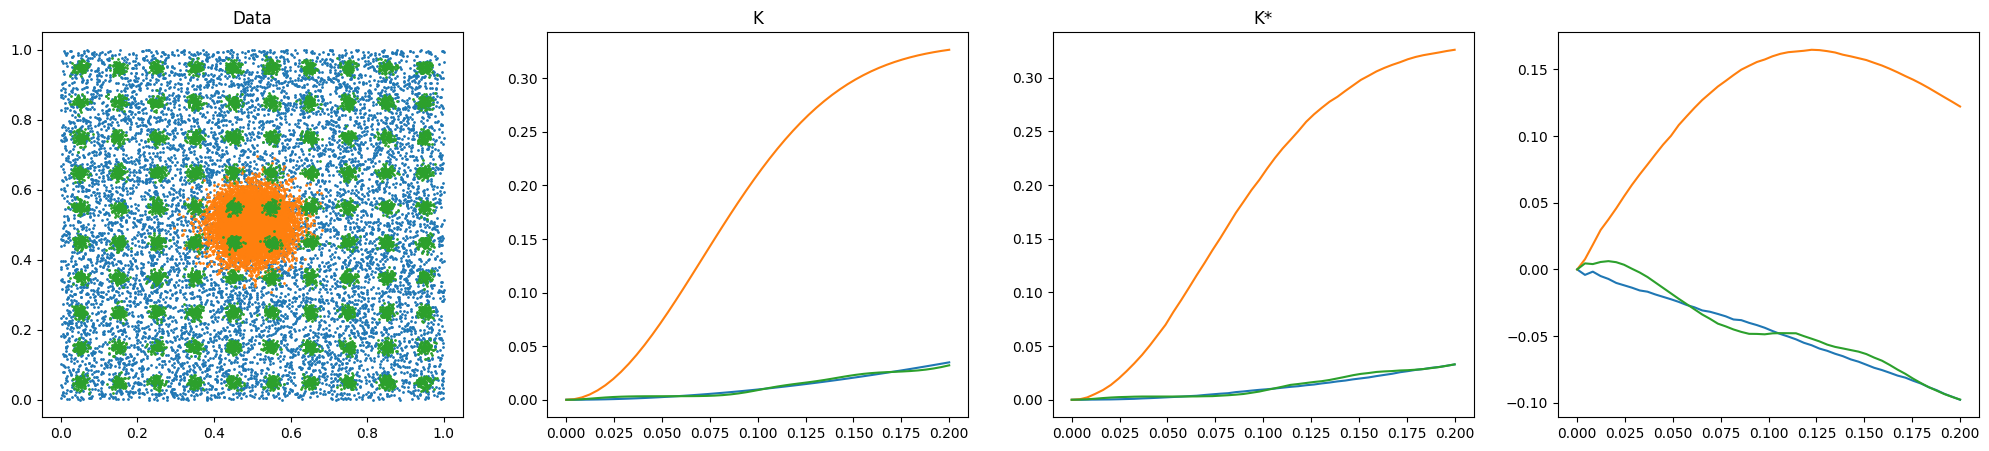

In [25]:

def calculate_ripley_k(distances, radaii, density, n):
    n_pairs_less_than_d = (distances < radaii.reshape(-1, 1))
    n_pairs_less_than_d_sum = n_pairs_less_than_d.sum(axis=1)
    k_estimate = ((n_pairs_less_than_d_sum * 2) / n) / density
    return k_estimate, n_pairs_less_than_d_sum[-1]


def subsample_k_by_random_pairs(data, n_pairs):
    # Determine subsample_size pairs of points in data
    pairs = np.random.choice(data.shape[0], (n_pairs, 2))
    pair_distances = np.linalg.norm(data[pairs[:, 0]] - data[pairs[:, 1]], axis=1)
    return pair_distances

def subsample_k_by_range_pairs(data, num_valid, radius):
    tree = cKDTree(data)
    pairs = tree.query_pairs(r=radius)
    pairs_array = np.fromiter(pairs, dtype=[('a', int), ('b', int)], count=len(pairs))
    pairs_array = pd.DataFrame(pairs_array).to_numpy()
    rand = np.random.choice(len(pairs), num_valid, replace=False)
    random_pairs = pairs_array[rand]
    pair_distances = np.linalg.norm(data[random_pairs[:, 0]] - data[random_pairs[:, 1]], axis=1)
    return pair_distances


radius = 0.2
x1, x2, x3 = create_data(10000)

combined_data = np.vstack([x1, x2, x3])
hull = ConvexHull(combined_data)
area = hull.volume
density = combined_data.shape[0] / area

# Create 3 plots for K, L, H
fig, ax = plt.subplots(1, 5, figsize=(25, 5))
radaii = np.linspace(0, radius, 50)
subsample_size = 1000
for data, label in zip([x1, x2, x3], ["x1", "x2", "x3"]):
    manual_distances = manual_ripley(data)
    k_manual, _ = calculate_ripley_k(manual_distances, radaii, density, data.shape[0])
    ax[1].plot(radaii, k_manual, label=label)

    subsample_distances = subsample_k_by_random_pairs(data, subsample_size)
    k_random, num_valid = calculate_ripley_k(subsample_distances, radaii, density, subsample_size /( num_pairwise(x1.shape[0])  / x1.shape[0]))
    ax[2].plot(radaii, k_random, label=label)
   
    # range_query_distances = subsample_k_by_range_pairs(data, num_valid, radius)
    # k_range, _ = calculate_ripley_k(range_query_distances, radaii, density, subsample_size /( num_pairwise(x1.shape[0])  / x1.shape[0]))
    # ax[3].plot(radaii, k_range, label=label)
  
    h_estimate = calculate_ripley_h(k_manual, radaii)
    h_random = calculate_ripley_h(k_random, radaii)
    ax[4].plot(radaii, h_random, label=label)
    ax[0].scatter(data[:, 0], data[:, 1], s=1, label=label)
ax[0].set_title("Data")
ax[1].set_title("K")
ax[2].set_title("K*")
ax[3].set_title("K**")




plt.show()

In [20]:
tree = cKDTree(data)
pairs = tree.query_pairs(r=radius)
pairs_array = np.fromiter(pairs, dtype="i,i", count=len(pairs))


In [21]:
k_random

array([0.        , 0.00033249, 0.00033249, 0.00066498, 0.00099747,
       0.00099747, 0.00099747, 0.00099747, 0.00132996, 0.00132996,
       0.00132996, 0.00132996, 0.00132996, 0.00132996, 0.00132996,
       0.00132996, 0.00132996, 0.00166245, 0.00232744, 0.00299242,
       0.0036574 , 0.0036574 , 0.00432238, 0.00598483, 0.00797978,
       0.00964223, 0.01263465, 0.01529458, 0.01662454, 0.01695703,
       0.01895198, 0.01961696, 0.02028194, 0.02094692, 0.02194439,
       0.02327436, 0.0252693 , 0.02626677, 0.02759674, 0.02859421,
       0.0289267 , 0.02925919, 0.02925919, 0.02959168, 0.03025666,
       0.03125414, 0.03225161, 0.0325841 , 0.03391406, 0.03690648])

In [22]:
out = np.empty(len(pairs_array), dtype=object)
out[:] = pairs_array
out

array([(1990, 9862), (2800, 8913), (462, 1900), ..., (682, 735),
       (6598, 9232), (4736, 8564)], dtype=object)

In [23]:
pairs_array.reshape(2)

ValueError: cannot reshape array of size 4839176 into shape (2,)

In [8]:
# import ripleyk

# radaii = np.linspace(0,radius,50)


# k1 = ripleyk.calculate_ripley(radii, 1, d1=xs[]
# 

In [9]:
data[:,0].shape

(10000,)

In [10]:
radaii.shape

(50,)

In [11]:
# plt.scatter(random_i[:,0], random_i[:,1], s=1)